In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (16.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and direc

In [2]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip3 install customized_konlpy

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,125 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,375 kB]
Fetched 3,733 kB in 6s (619 kB/s)
Reading package lists... Done

In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd
import urllib.request
import matplotlib.pyplot as plt
import re
from ckonlpy.tag import Twitter

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

okt = Twitter()

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [88]:
naver_news = pd.read_csv('/content/drive/MyDrive/항공사/네이버 뉴스 크롤링 결과.csv', encoding='cp949')

In [89]:
naver_blog = pd.read_csv('/content/drive/MyDrive/항공사/네이버 블로그 크롤링 결과.csv')

In [90]:
naver_news

,title,link,description,bloggername,bloggerlink,postdate,pubDate,originallink
0,2030년까지 6G 저궤도 위성통신 시범망 만든다... 3000억원 투입 예타 통과,https://n.news.naver.com/mnews/article/469/000...,그만큼 <b>지연</b> 시간이 줄어 고속 통신이 가능하다. 저궤도 통신위성은 방위...,NaN,NaN,NaN,"Thu, 23 May 2024 11:12:00 +0900",https://www.hankookilbo.com/News/Read/A2024052...
1,&quot;우리도 스타링크처럼&quot; 저궤도 위성통신 첫발…3200억 사업 예타통과,https://n.news.naver.com/mnews/article/277/000...,"자율주행, UAM(도심<b>항공</b>교통) 등 6세대(G) 통신 기술 산업에 적용...",NaN,NaN,NaN,"Thu, 23 May 2024 11:01:00 +0900",https://view.asiae.co.kr/article/2024052310021...
2,6G 인프라 저궤도 통신위성 2030년 발사…3200억 예타 통과,https://n.news.naver.com/mnews/article/421/000...,"아울러 지상의 전파 기지국의 한계를 뛰어넘어 해상, 공중까지 통신 서비스 공간을 확...",NaN,NaN,NaN,"Thu, 23 May 2024 11:00:00 +0900",https://www.news1.kr/articles/5424420
3,"중국 무역보복 <b>항공</b> 분야로 향한다, 보잉 <b>항공</b>기 배터리 조...",https://www.businesspost.co.kr/BP?command=arti...,&lt;연합뉴스&gt; 중국 규제당국이 보잉 <b>항공</b>기 기체에 탑재되는 배...,NaN,NaN,NaN,"Thu, 23 May 2024 10:42:00 +0900",https://www.businesspost.co.kr/BP?command=arti...
4,"나신평 &quot;<b>항공</b>업계, 수요 증가로 실적 유지 전망&quot;",http://www.finomy.com/news/articleView.html?id...,나신평은 여객 부문은 여객기 공급 확대로 여객 운임 하락이 예상되나 러시아-우크라이...,NaN,NaN,NaN,"Thu, 23 May 2024 10:28:00 +0900",http://www.finomy.com/news/articleView.html?id...
...,...,...,...,...,...,...,...,...
995,'예타 3수생' 6G 저궤도 위성통신 사업 이번엔 통과할까,https://n.news.naver.com/mnews/article/015/000...,이 사업은 국방·안보와 도심<b>항공</b>모빌리티(UAM) 등 미래 산업의 핵심 ...,NaN,NaN,NaN,"Sun, 28 Apr 2024 19:03:00 +0900",https://www.hankyung.com/article/2024042824991
996,자율주행 시장 커지자…차세대 통신 경쟁,https://n.news.naver.com/mnews/article/009/000...,도심<b>항공</b>교통(UAM) 사업을 선점하기 위한 장기적인 계획이기도 하다. ...,NaN,NaN,NaN,"Sun, 28 Apr 2024 17:46:00 +0900",https://www.mk.co.kr/article/11002249
997,제주공항 광제탑 건물 신축사업 부실…레이더 미감지 지역 발생,http://www.jejunews.com/news/articleView.html?...,"이 때문에 후속 조치를 위한 추가 비용이 발생했고, 진행 중인 레이더 교체 사업도 ...",NaN,NaN,NaN,"Sun, 28 Apr 2024 14:52:00 +0900",http://www.jejunews.com/news/articleView.html?...
998,"또 보잉이네…델타<b>항공</b> 여객기, 비상 슬라이드 문제로 긴급 회항",https://n.news.naver.com/mnews/article/277/000...,이후 사우스웨스트 <b>항공</b>은 성명을 내고 &quot;(해당 <b>항공</b...,NaN,NaN,NaN,"Sun, 28 Apr 2024 14:11:00 +0900",https://view.asiae.co.kr/article/2024042813511...


In [91]:
naver_blog

,title,link,description,bloggername,bloggerlink,postdate,pubDate,originallink
0,터키<b>항공 지연</b>보상 88만원 환불받는 방법,https://blog.naver.com/rooster57/223413236428,터키<b>항공 지연</b>보상받는 방법 1. 터키항공 본사에 지연 보상 이메일 전송...,나강 NAkANG,blog.naver.com/rooster57,20240412,NaN,NaN
1,"사이판 자유여행 2탄 : 티웨이 <b>항공 지연</b>, 비행기 사전 좌석...",https://blog.naver.com/kiki9175/223373828184,티웨이 <b>항공 지연</b> 티웨이 TW307 연결편 도착지연으로 45분 지연된다...,반짝반짝 빛나는 ★,blog.naver.com/kiki9175,20240305,NaN,NaN
2,"별루다, 말레이시아<b>항공</b> 취소 &amp; <b>지연</b> &amp; 수하물",https://blog.naver.com/dmlgml76/223455085000,쿠알라룸푸르 → 인천 여행 중 온라인체크인하려고 들어갔더니 너무나 자연스럽게 1시간...,1% 다르게...,blog.naver.com/dmlgml76,20240522,NaN,NaN
3,"부산에서 다합까지, 이집트 여행, 카타르<b>항공 지연</b> 후기",https://blog.naver.com/haha1722/223432581819,중동 <b>항공</b>들의 연착 <b>지연</b>은 너무 흔한일 다음 환승행이 4시...,탐나는갸,blog.naver.com/haha1722,20240501,NaN,NaN
4,타오위안공항 대만 면세점 구경 아시아나<b>항공지연</b> 식음료이용권,https://blog.naver.com/joara127/223332979339,대만달러 항공기 지연으로 인해 늦게 도착하니까 서울과 경기남부 경기북부의 경우 심야...,아라가는이야기,blog.naver.com/joara127,20240125,NaN,NaN
...,...,...,...,...,...,...,...,...
995,"[대만여행 마지막] 진천미, 타오위안 공항, 대한<b>항공</b> 대만 <b>지연<...",https://blog.naver.com/kooki_-/223403728444,3시간 정도 <b>지연</b>이 되서 새벽 1시 30분 정도에 인천공항에 도착했지만...,노는 게 제일 좋은 .____.,blog.naver.com/kooki_-,20240402,NaN,NaN
996,"[<b>항공</b> 뉴스] 아시아나<b>항공</b>, 7일부터 무더기 <b>지연</...",https://blog.naver.com/kiwanryu/223121651793,지상에서 <b>항공</b>기를 저속 주행하는 상황까지 겹칠 경우 <b>지연</b> ...,Dapper Alex Daddy,blog.naver.com/kiwanryu,20230606,NaN,NaN
997,무안 -&gt; 다낭 출발 제주<b>항공</b> <b>항공</b>기 <b>지연</b...,https://blog.naver.com/kimna2007/221344433401,최소 이건 1시간 넘을각이다...부터 시작해서 불안해지기 시작해서 네이버에 <b>항...,꽃비서 Blog,blog.naver.com/kimna2007,20180823,NaN,NaN
998,발리 여행 스쿠트 <b>항공</b> 탑승 솔직 후기 <b>지연</b> 싱가포르 창이...,https://blog.naver.com/rla0al4/223402749508,"비행기 쿠션도 찢어진 모습이에요 정말 지금까지 탔던 비행기 중에 최악이에요 비엣젯,...",우뢰매♥ 가족 이야기,blog.naver.com/rla0al4,20240402,NaN,NaN


In [92]:
naver_a = pd.concat([naver_blog[['title', 'description']], naver_news[['title', 'description']]], ignore_index=True)

In [93]:
print(naver_a['title'])

0                          터키<b>항공 지연</b>보상 88만원 환불받는 방법
1          사이판 자유여행 2탄 : 티웨이 <b>항공 지연</b>, 비행기 사전 좌석... 
2       별루다, 말레이시아<b>항공</b> 취소 &amp; <b>지연</b> &amp; 수하물
3                  부산에서 다합까지, 이집트 여행, 카타르<b>항공 지연</b> 후기
4                타오위안공항 대만 면세점 구경 아시아나<b>항공지연</b> 식음료이용권
                              ...                       
1995                    '예타 3수생' 6G 저궤도 위성통신 사업 이번엔 통과할까
1996                               자율주행 시장 커지자…차세대 통신 경쟁
1997                   제주공항 광제탑 건물 신축사업 부실…레이더 미감지 지역 발생
1998           또 보잉이네…델타<b>항공</b> 여객기, 비상 슬라이드 문제로 긴급 회항
1999    &quot;과잉생산? 중국 발전 막으려는 미국이 만든 말&quot; 대응수위 높이는 中
Name: title, Length: 2000, dtype: object


In [94]:
print(naver_a['description'])

0       터키<b>항공 지연</b>보상받는 방법 1. 터키항공 본사에 지연 보상 이메일 전송...
1       티웨이 <b>항공 지연</b> 티웨이 TW307 연결편 도착지연으로 45분 지연된다...
2       쿠알라룸푸르 → 인천 여행 중 온라인체크인하려고 들어갔더니 너무나 자연스럽게 1시간...
3       중동 <b>항공</b>들의 연착 <b>지연</b>은 너무 흔한일 다음 환승행이 4시...
4       대만달러 항공기 지연으로 인해 늦게 도착하니까 서울과 경기남부 경기북부의 경우 심야...
                              ...                        
1995    이 사업은 국방·안보와 도심<b>항공</b>모빌리티(UAM) 등 미래 산업의 핵심 ...
1996    도심<b>항공</b>교통(UAM) 사업을 선점하기 위한 장기적인 계획이기도 하다. ...
1997    이 때문에 후속 조치를 위한 추가 비용이 발생했고, 진행 중인 레이더 교체 사업도 ...
1998    이후 사우스웨스트 <b>항공</b>은 성명을 내고 &quot;(해당 <b>항공</b...
1999    전환을 <b>지연</b>시킬 것&quot;이라고 비판했다. 그는 이어 &quot;미...
Name: description, Length: 2000, dtype: object


In [95]:
naver_a

,title,description
0,터키<b>항공 지연</b>보상 88만원 환불받는 방법,터키<b>항공 지연</b>보상받는 방법 1. 터키항공 본사에 지연 보상 이메일 전송...
1,"사이판 자유여행 2탄 : 티웨이 <b>항공 지연</b>, 비행기 사전 좌석...",티웨이 <b>항공 지연</b> 티웨이 TW307 연결편 도착지연으로 45분 지연된다...
2,"별루다, 말레이시아<b>항공</b> 취소 &amp; <b>지연</b> &amp; 수하물",쿠알라룸푸르 → 인천 여행 중 온라인체크인하려고 들어갔더니 너무나 자연스럽게 1시간...
3,"부산에서 다합까지, 이집트 여행, 카타르<b>항공 지연</b> 후기",중동 <b>항공</b>들의 연착 <b>지연</b>은 너무 흔한일 다음 환승행이 4시...
4,타오위안공항 대만 면세점 구경 아시아나<b>항공지연</b> 식음료이용권,대만달러 항공기 지연으로 인해 늦게 도착하니까 서울과 경기남부 경기북부의 경우 심야...
...,...,...
1995,'예타 3수생' 6G 저궤도 위성통신 사업 이번엔 통과할까,이 사업은 국방·안보와 도심<b>항공</b>모빌리티(UAM) 등 미래 산업의 핵심 ...
1996,자율주행 시장 커지자…차세대 통신 경쟁,도심<b>항공</b>교통(UAM) 사업을 선점하기 위한 장기적인 계획이기도 하다. ...
1997,제주공항 광제탑 건물 신축사업 부실…레이더 미감지 지역 발생,"이 때문에 후속 조치를 위한 추가 비용이 발생했고, 진행 중인 레이더 교체 사업도 ..."
1998,"또 보잉이네…델타<b>항공</b> 여객기, 비상 슬라이드 문제로 긴급 회항",이후 사우스웨스트 <b>항공</b>은 성명을 내고 &quot;(해당 <b>항공</b...


In [96]:
naver_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        2000 non-null   object
 1   description  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [97]:
naver_title =naver_a['title']

In [98]:
naver_des = naver_a['description']

In [60]:
k_stopword = pd.read_csv('/content/drive/MyDrive/항공사/korean_stopword.csv')

In [99]:
stopword = list(k_stopword['불용어'])+['을','은','를','이가','과','의','는','에','\n','-','_','\n\n','</b>','<b>','→','&amp;','[',']','-&gt;',')','(','</ b >','< b >','항공']

In [100]:
# `stopword`를 set으로 변환 (이미 set이면 변환하지 않음)
if not isinstance(stopword, set):
    stopword = set(stopword)

# `naver_a['title']`의 각 항목이 문자열인지 확인하고, 문자열이 아니면 건너뜀
naver_list = []
for text in naver_title:
    if isinstance(text, str):
        morph = okt.morphs(text)  # 형태소 분석
        temp_X = [txt for txt in morph if txt not in stopword]  # 불용어 제거
        naver_list.append(" ".join(temp_X))  # 단어들을 다시 문장으로 결합

naver_list


['터키 < b > 지연 </ b > 보상 88 만원 환불 받는 방법',
 '사이판 자유여행 2 탄 : 티웨이 < b > 지연 </ b >, 비행기 사전 좌석 ...',
 '별루 다 , 말레이시아 < b > </ b > 취소 & amp ; < b > 지연 </ b > & amp ; 수하물',
 '부산 에서 다합 , 이집트 여행 , 카타르 < b > 지연 </ b > 후기',
 '타오위안 공항 대만 면세점 구경 아시아나 < b > 지연 </ b > 식 음료 이용권',
 '대만 여행 스쿠트 < b > </ b > 출발 < b > 지연 </ b > 후기 SCOOT TR 897 보상 ...',
 '이스 타 < b > 지연 </ b > 겪고 출발 베트남 나트랑 여행 4 박 6일 ...',
 '터키 < b > 지연 </ b > 보상 신청 방법 및 지연 보상 받은 후기',
 '비행기 < b > 지연 </ b >] 진에어 LJ 204 < b > </ b > 편 12 < b > 지연 </ b > 후기 ...',
 '난바역 에서 간사이 공항 , 급행열차 ! 930 970엔 + 피치 < b > 지연 </ b >',
 '< b > </ b > 후기 및 장단점 수하물 , 체크 인 , 기내식 , 경유 < b > 지연 </ b >...',
 '미국 < b > </ b > 델타 < b > </ b > 후기 DL 158 인천 디트로이트 < b > 지연 </ b > 보상 ...',
 '젯 스타 < b > 지연 </ b > 기내식 좌석 후기 및 온라인 체크 인 ...',
 'LOT < b > </ b > 프라하 바르샤바 경유 : 좌석 , 기내식 , < b > 지연 </ b >, 간식',
 '제주 청주 아시아나 < b > 지연 </ b >, 음료 서비스 개시 , oz 8232 편 ...',
 '비엣젯 < b > </ b > 위탁 수하물 추가 < b > 지연 </ b > 비상구 좌석 기내식 호치민 ...',
 '01 홍콩 아시아나 < b > 지연 </ b >/ 면세 품 / 홍딸 인 출 / 새벽 버

In [101]:
# `stopword`를 set으로 변환 (이미 set이면 변환하지 않음)
if not isinstance(stopword, set):
    stopword = set(stopword)

# `naver_a['description']`의 각 항목이 문자열인지 확인하고, 문자열이 아니면 건너뜀
naver_list2 = []
for text in naver_des:
    if isinstance(text, str):
        morph = okt.morphs(text)  # 형태소 분석
        temp_X = [txt for txt in morph if txt not in stopword]  # 불용어 제거
        naver_list2.append(" ".join(temp_X))  # 단어들을 다시 문장으로 결합

naver_list2

['터키 < b > 지연 </ b > 보상 받는 방법 1 . 터키항공 본사 지연 보상 이메일 전송 하기 이름 , 이메일 , 전화번호 / PNR 코드 , E 티켓 넘버 / 겪은 불편 함 , 상황 영어 작성 어떻게 적었는지 인적 인 내용 ...',
 '티웨이 < b > 지연 </ b > 티웨이 TW 307 연결 편 도착 지연 으로 45분 지연 된다는 카톡 출발 당일 아침 8:55분 ... 티웨이 오후 7:45분 비행기 2 지연 으로 9시 30분 출발 입국 수속 30분 소요 게 도착 하니 .....',
 '쿠알라룸푸르 인천 여행 온라인 체크 인 들어갔 더니 너무나 자연 스럽게 1 < b > 지연 </ b > 된 < b > </ b > 편 5월 17일 14:50 15:50 허허 기 차네 인천 도착 예정 23:30 , 공항버스 00:30 이라 삐끗 하면 버스 ...',
 '중동 < b > </ b > 들의 연착 < b > 지연 </ b > 너무 흔 한일 다음 환승 행 4 뒤 라 망 정이지 쯧 ? 1 만에 자사고 이미 그레이 션 나가 서 환전 하고 유심 사고 국내선 환승 가능 맛있넹 ... 가능 할 지도 ? ^,^ 명심 하자 ...',
 '대만 달러 항공기 지연 으로 인해 늦게 도착 하니 까 서울 경기 남부 경기 북부 심야 교통 편 지원 해주 공항 주차장 주차 했을 초과 주차 비도 지원 줘요 . 그리 1 인당 아시아나 < b > 지연 </ b > ...',
 '대만 여행 스쿠트 출발 지연 인천공항 가는 교통사고 공항 노숙 VS 호텔 숙박 날림 SCOOT TR 897 ... 생 각하 면서 아깝 기도 하고 당황 스럽 기도 했는데 좋게 하자 , 스쿠트 < b > 지연 </ b > 많다 더니 일이 ...',
 'ㅎㅎ 베트남 캄란 공항 으로 가는 이스타항공 ZE 561 편 헐 ... 지연 이라고 11시 쯤 출발 할거 라네 ? 아직 ... 혼자 인사 이스 타 < b > 지연 </ b > 22시 30분 출발 지만 22시 30분 탑승 했 . 가자 ~~ 베트남 나트랑 으로 .....',

In [102]:
naver_total_list = naver_list + naver_list2
naver_total_list

['터키 < b > 지연 </ b > 보상 88 만원 환불 받는 방법',
 '사이판 자유여행 2 탄 : 티웨이 < b > 지연 </ b >, 비행기 사전 좌석 ...',
 '별루 다 , 말레이시아 < b > </ b > 취소 & amp ; < b > 지연 </ b > & amp ; 수하물',
 '부산 에서 다합 , 이집트 여행 , 카타르 < b > 지연 </ b > 후기',
 '타오위안 공항 대만 면세점 구경 아시아나 < b > 지연 </ b > 식 음료 이용권',
 '대만 여행 스쿠트 < b > </ b > 출발 < b > 지연 </ b > 후기 SCOOT TR 897 보상 ...',
 '이스 타 < b > 지연 </ b > 겪고 출발 베트남 나트랑 여행 4 박 6일 ...',
 '터키 < b > 지연 </ b > 보상 신청 방법 및 지연 보상 받은 후기',
 '비행기 < b > 지연 </ b >] 진에어 LJ 204 < b > </ b > 편 12 < b > 지연 </ b > 후기 ...',
 '난바역 에서 간사이 공항 , 급행열차 ! 930 970엔 + 피치 < b > 지연 </ b >',
 '< b > </ b > 후기 및 장단점 수하물 , 체크 인 , 기내식 , 경유 < b > 지연 </ b >...',
 '미국 < b > </ b > 델타 < b > </ b > 후기 DL 158 인천 디트로이트 < b > 지연 </ b > 보상 ...',
 '젯 스타 < b > 지연 </ b > 기내식 좌석 후기 및 온라인 체크 인 ...',
 'LOT < b > </ b > 프라하 바르샤바 경유 : 좌석 , 기내식 , < b > 지연 </ b >, 간식',
 '제주 청주 아시아나 < b > 지연 </ b >, 음료 서비스 개시 , oz 8232 편 ...',
 '비엣젯 < b > </ b > 위탁 수하물 추가 < b > 지연 </ b > 비상구 좌석 기내식 호치민 ...',
 '01 홍콩 아시아나 < b > 지연 </ b >/ 면세 품 / 홍딸 인 출 / 새벽 버

In [103]:
# 제거할 문자열 목록
remove_list = ['<b>', '<\\b>', '< b >', '<\\ b >', ' ', '\'', '</b>', '&quot;', '&amp;', '/']

# 문자열 제거 함수
def clean_string(s):
    for rm in remove_list:
        s = s.replace(rm, '')
    return s

# 리스트 내 모든 문자열 처리
naver_total_list2 = [clean_string(s) for s in naver_total_list]

print(naver_total_list2)

['터키지연보상88만원환불받는방법', '사이판자유여행2탄:티웨이지연,비행기사전좌석...', '별루다,말레이시아취소지연수하물', '부산에서다합,이집트여행,카타르지연후기', '타오위안공항대만면세점구경아시아나지연식음료이용권', '대만여행스쿠트출발지연후기SCOOTTR897보상...', '이스타지연겪고출발베트남나트랑여행4박6일...', '터키지연보상신청방법및지연보상받은후기', '비행기지연]진에어LJ204편12지연후기...', '난바역에서간사이공항,급행열차!930970엔+피치지연', '후기및장단점수하물,체크인,기내식,경유지연...', '미국델타후기DL158인천디트로이트지연보상...', '젯스타지연기내식좌석후기및온라인체크인...', 'LOT프라하바르샤바경유:좌석,기내식,지연,간식', '제주청주아시아나지연,음료서비스개시,oz8232편...', '비엣젯위탁수하물추가지연비상구좌석기내식호치민...', '01홍콩아시아나지연면세품홍딸인출새벽버스호스텔', '코로나백신해외여행자보험후기la공항델타지연보상', '싱가포르1일차스쿠트지연최고고든램지식당뿌시...', '젯스타비지니스기내식좌석지연후기feat.시드니', 'JAL]일본하네다공항1540분지연..다음날출국...', '타이베이2박3일ㅣ푸홍뉴러우용산사행복당스쿠트지연', '시드니젯스타탑승후기(+가격,좌석,기내식,지연확인...', '지연보상항공사...인한에티오피아공항12지연후기', '오사카행아시아나지연피해어쩔죠?', '마이뱅크보험금신청티웨이탑승지연간사이공항', '필리핀여행보홀공항라운지X카페공항세제주지연후기', '그레이터베이]홍콩여행국적기탑승및비행지연보상...', '쿠알라룸푸르여행말레이시아지연결항콤보14...', '터키]결항,지연보상진행후기', '김포공항제주도폭설비행기결항지연정보이스타...', '뉴질랜드오클랜드┃KE411┃기내식┃편지연주의!!✈', 'HKExpress홍콩익스프레스지연....후기', '비엣젯지연결항보상,보상금8개월만에받은후기', '유럽여행1일차인천공항출국폴란드LOT지연...', '피치오사카후기비행기지연환불탑승', '제주지연,스케줄무료

In [104]:
naver_total_list2

['터키지연보상88만원환불받는방법',
 '사이판자유여행2탄:티웨이지연,비행기사전좌석...',
 '별루다,말레이시아취소지연수하물',
 '부산에서다합,이집트여행,카타르지연후기',
 '타오위안공항대만면세점구경아시아나지연식음료이용권',
 '대만여행스쿠트출발지연후기SCOOTTR897보상...',
 '이스타지연겪고출발베트남나트랑여행4박6일...',
 '터키지연보상신청방법및지연보상받은후기',
 '비행기지연]진에어LJ204편12지연후기...',
 '난바역에서간사이공항,급행열차!930970엔+피치지연',
 '후기및장단점수하물,체크인,기내식,경유지연...',
 '미국델타후기DL158인천디트로이트지연보상...',
 '젯스타지연기내식좌석후기및온라인체크인...',
 'LOT프라하바르샤바경유:좌석,기내식,지연,간식',
 '제주청주아시아나지연,음료서비스개시,oz8232편...',
 '비엣젯위탁수하물추가지연비상구좌석기내식호치민...',
 '01홍콩아시아나지연면세품홍딸인출새벽버스호스텔',
 '코로나백신해외여행자보험후기la공항델타지연보상',
 '싱가포르1일차스쿠트지연최고고든램지식당뿌시...',
 '젯스타비지니스기내식좌석지연후기feat.시드니',
 'JAL]일본하네다공항1540분지연..다음날출국...',
 '타이베이2박3일ㅣ푸홍뉴러우용산사행복당스쿠트지연',
 '시드니젯스타탑승후기(+가격,좌석,기내식,지연확인...',
 '지연보상항공사...인한에티오피아공항12지연후기',
 '오사카행아시아나지연피해어쩔죠?',
 '마이뱅크보험금신청티웨이탑승지연간사이공항',
 '필리핀여행보홀공항라운지X카페공항세제주지연후기',
 '그레이터베이]홍콩여행국적기탑승및비행지연보상...',
 '쿠알라룸푸르여행말레이시아지연결항콤보14...',
 '터키]결항,지연보상진행후기',
 '김포공항제주도폭설비행기결항지연정보이스타...',
 '뉴질랜드오클랜드┃KE411┃기내식┃편지연주의!!✈',
 'HKExpress홍콩익스프레스지연....후기',
 '비엣젯지연결항보상,보상금8개월만에받은후기',
 '유럽여행1일차인천공항출국폴란드LOT지연...

In [ ]:
# from konlpy.tag import Okt


# # Define a function to filter Nouns
# def extract_nouns(sentence):
#     # Apply pos tagging
#     pos_tags = okt.pos(sentence)
#     # Filter nouns
#     nouns = [word for word, pos in pos_tags if pos.startswith('N')]
#     return nouns

# # Filter Nouns from each element in total_list
# filtered_total_list = [extract_nouns(sentence) for sentence in total_list]

# # Print the filtered list
# for i, nouns in enumerate(filtered_total_list):
#     print(f"total_list[{i}]: {nouns}")

In [105]:
from konlpy.tag import Okt

# Define a function to filter Nouns
def extract_nouns(sentence):
    # Apply pos tagging
    pos_tags = okt.pos(sentence)
    # Filter nouns
    nouns = [word for word, pos in pos_tags if pos.startswith('N')]
    return nouns

# Create a new list to store filtered nouns from total_list
filtered_nouns_list = []

# Filter nouns from each element in total_list and append to filtered_nouns_list
for sentence in naver_total_list2:
    filtered_nouns_list.append(extract_nouns(sentence))

# Print the filtered list
for i, nouns in enumerate(filtered_nouns_list):
    print(f"filtered_nouns_list[{i}]: {nouns}")


filtered_nouns_list[0]: ['터키', '지연', '보상', '88', '만원', '환불', '방법']
filtered_nouns_list[1]: ['사이판', '자유여행', '2', '티웨이', '지연', '비행기', '사전', '좌석']
filtered_nouns_list[2]: ['별루', '말레이시아', '취소', '연', '수하물']
filtered_nouns_list[3]: ['부산', '다합', '이집트', '여행', '카타르', '지연', '후기']
filtered_nouns_list[4]: ['타오위안', '공항', '대만', '면세점', '구경', '아시아나', '연식', '음료', '이용권']
filtered_nouns_list[5]: ['대만', '여행', '스쿠트', '출발', '연후', '기', '897', '보상']
filtered_nouns_list[6]: ['이스', '타지', '연', '출발', '베트남', '나트랑', '행', '4', '박', '6일']
filtered_nouns_list[7]: ['터키', '지연', '보상', '신청', '방법', '및', '지연', '보상', '후기']
filtered_nouns_list[8]: ['비행기', '지연', '진에어', '204', '편', '12', '지연', '후기']
filtered_nouns_list[9]: ['난바역', '간사이', '공항', '급행열차', '930970엔', '피치', '지연']
filtered_nouns_list[10]: ['후기', '및', '장단점', '수하물', '체크', '기내식', '경', '유지연']
filtered_nouns_list[11]: ['미국', '델타', '후기', '158', '인천', '디트로이트', '연보', '상']
filtered_nouns_list[12]: ['젯', '스타', '지연', '기내식', '좌석', '후기', '및', '온라인', '체크']
filtered_nouns_list[13]: 

In [106]:
filtered_nouns_list

[['터키', '지연', '보상', '88', '만원', '환불', '방법'],
 ['사이판', '자유여행', '2', '티웨이', '지연', '비행기', '사전', '좌석'],
 ['별루', '말레이시아', '취소', '연', '수하물'],
 ['부산', '다합', '이집트', '여행', '카타르', '지연', '후기'],
 ['타오위안', '공항', '대만', '면세점', '구경', '아시아나', '연식', '음료', '이용권'],
 ['대만', '여행', '스쿠트', '출발', '연후', '기', '897', '보상'],
 ['이스', '타지', '연', '출발', '베트남', '나트랑', '행', '4', '박', '6일'],
 ['터키', '지연', '보상', '신청', '방법', '및', '지연', '보상', '후기'],
 ['비행기', '지연', '진에어', '204', '편', '12', '지연', '후기'],
 ['난바역', '간사이', '공항', '급행열차', '930970엔', '피치', '지연'],
 ['후기', '및', '장단점', '수하물', '체크', '기내식', '경', '유지연'],
 ['미국', '델타', '후기', '158', '인천', '디트로이트', '연보', '상'],
 ['젯', '스타', '지연', '기내식', '좌석', '후기', '및', '온라인', '체크'],
 ['프라하', '바르샤바', '경유', '좌석', '기내식', '지연', '간식'],
 ['제주', '청주', '아시아나', '연', '음료', '서비스', '개시', '8232', '편'],
 ['비엣젯', '위탁', '수하물', '추가', '연', '비상구', '좌석', '기내식', '호치민'],
 ['01', '홍콩', '아시아나', '연', '면세', '품홍딸', '새벽', '버스', '호스텔'],
 ['코로나', '백신', '해외여행', '자', '보험', '후기', '공항', '델타', '연보', '상'],
 ['싱가포르', '1', '일차',

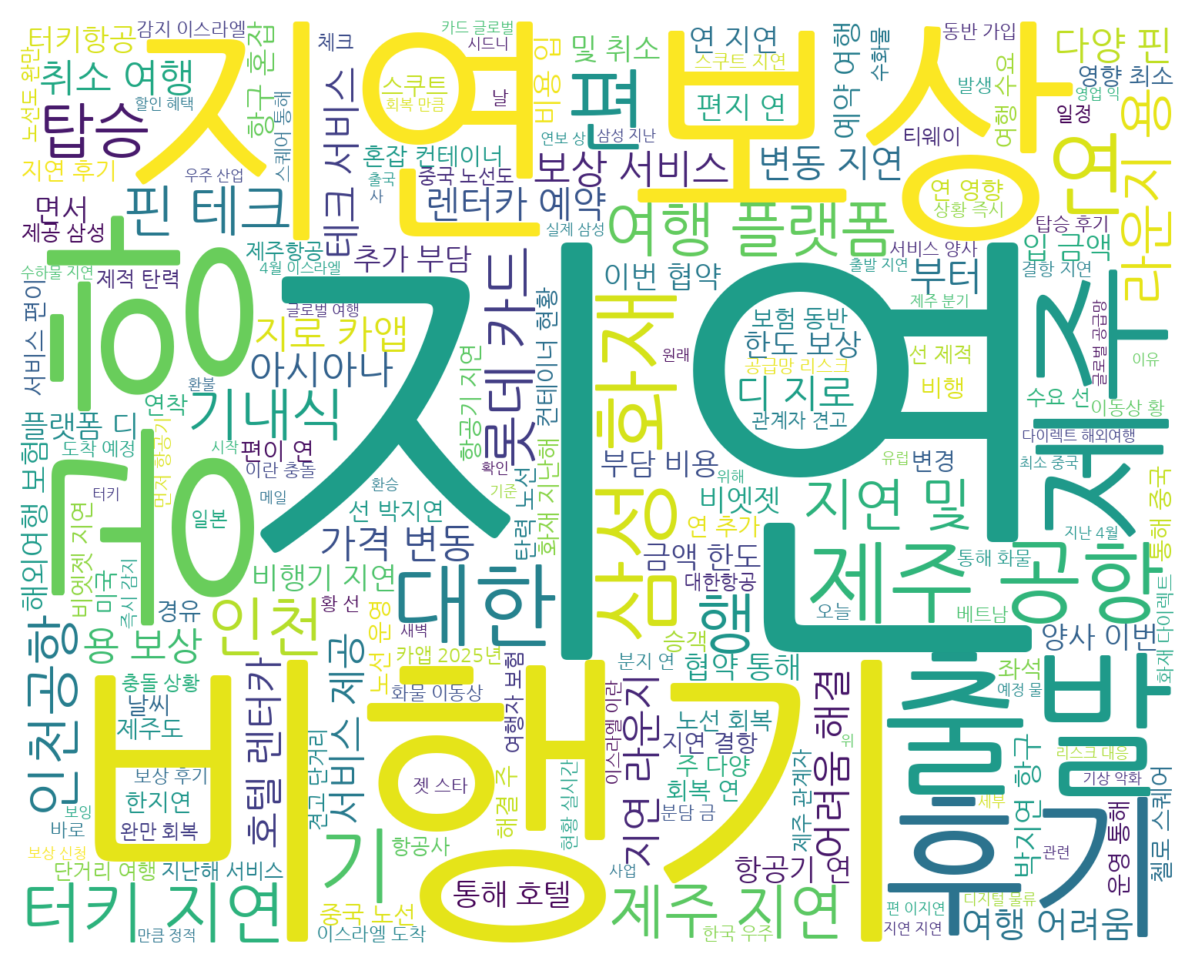

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all nouns into a single string
text = ' '.join([' '.join(nouns) for nouns in filtered_nouns_list])

# Generate a word cloud with higher resolution
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white', width=1500, height=1200).generate(text)

# Adjust DPI for higher quality
plt.figure(figsize=(8, 6), dpi=200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
# word_counts.most에 지연 연 여행 1 편 삼성  및 중국 기 2 항공기 터키 행 편이 3 이런 관계가 하나도 없는 단어 삭제

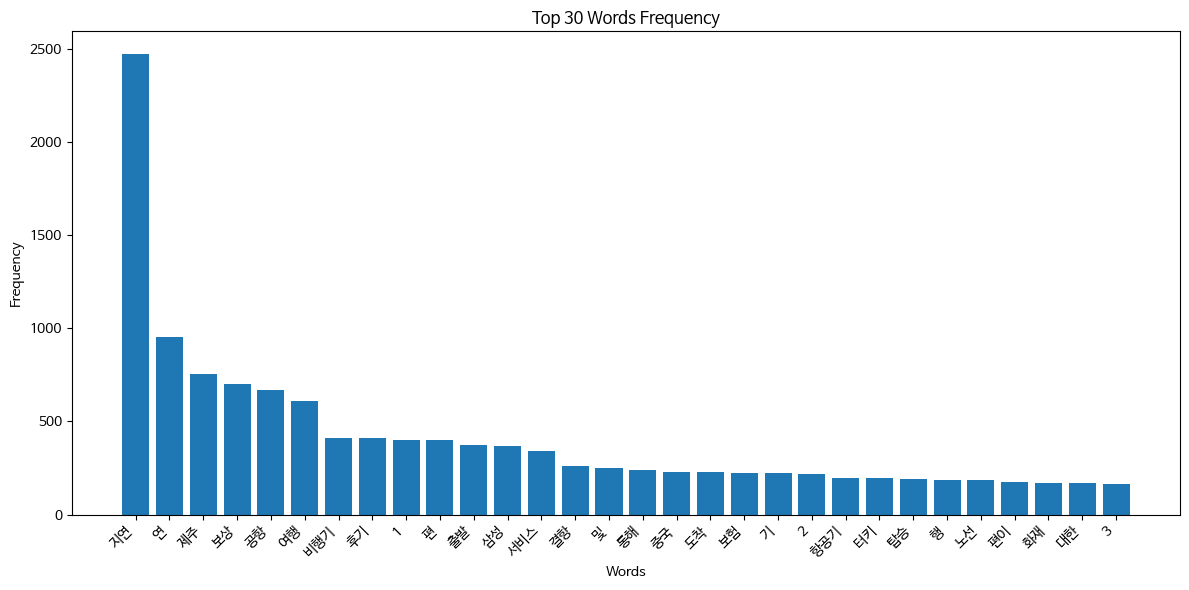

In [127]:
from collections import Counter

# 모든 단어의 빈도수 계산
all_words = [word for sublist in filtered_nouns_list for word in sublist]
word_counts = Counter(all_words)

# 빈도수가 가장 높은 상위 30개 단어 선택
top_words = word_counts.most_common(30)

# 그래프를 그리기 위해 데이터 분리
words, counts = zip(*top_words)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

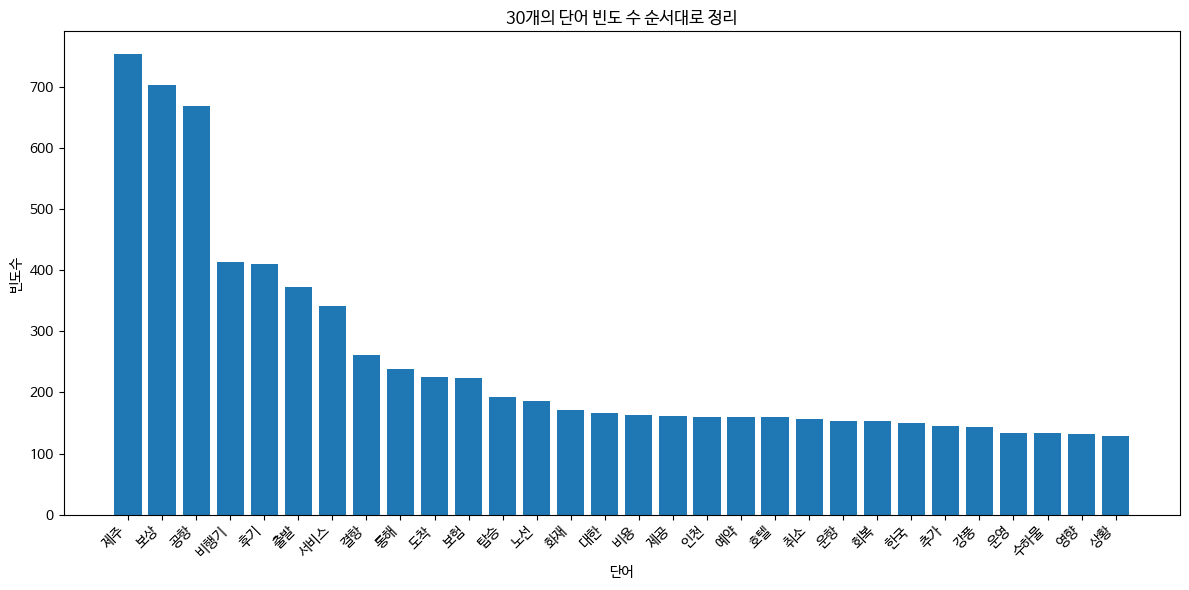

In [139]:
# 삭제할 단어들
words_to_remove = ['지연', '연', '여행', '1', '편', '삼성', '및', '중국', '기', '2', '항공기', '터키', '행', '3', '편이', '비엣젯', '스쿠트', '선', '21', '4', '예정', '이번','날']

# 삭제할 단어들 제거
for word in words_to_remove:
    del word_counts[word]

# 상위 30개 단어 재설정
top_words = word_counts.most_common(30)

# 그래프를 그리기 위해 데이터 분리
words, counts = zip(*top_words)

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel('단어')
plt.ylabel('빈도수')
plt.title('30개의 단어 빈도 수 순서대로 정리')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [136]:
# 'top_words' 리스트의 각 요소가 문자열로 이루어져 있는지 확인하는 코드 추가
all_strings = all(isinstance(item, str) for sublist in top_words for item in sublist)
if all_strings:
    # 'top_words' 리스트의 모든 요소가 문자열이라면 진행
    text = ' '.join([' '.join(nouns) for nouns in top_words])
else:
    # 'top_words' 리스트의 요소 중 하나라도 문자열이 아니라면 오류 메시지 출력
    print("Error: All elements in 'top_words' list must be strings.")

Error: All elements in 'top_words' list must be strings.


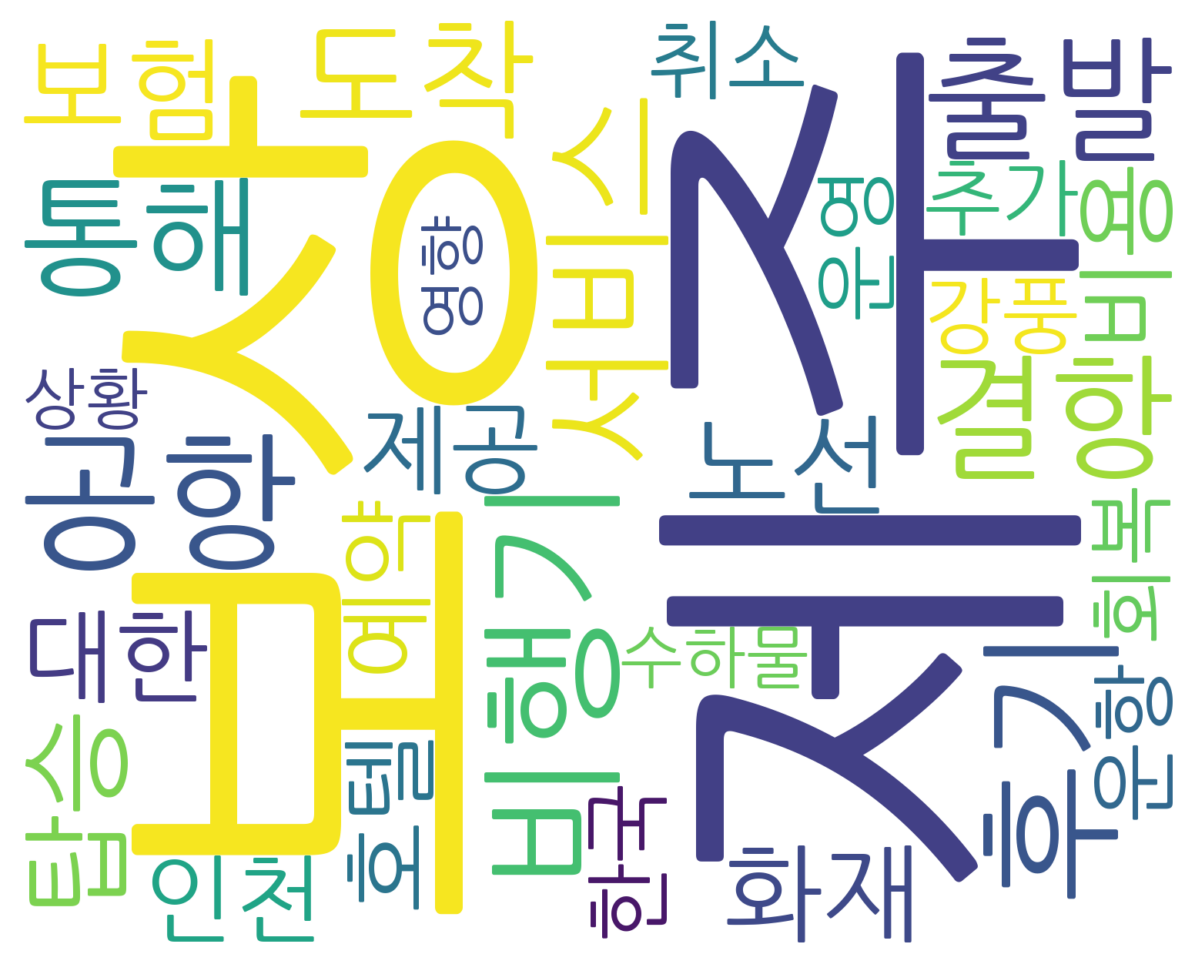

In [138]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all nouns into a single string
text = ' '.join([' '.join(map(str, nouns)) for nouns in top_words])

# Generate a word cloud with higher resolution
wordcloud = WordCloud(font_path='font/NanumGothic.ttf', background_color='white', width=1500, height=1200).generate(text)

# Adjust DPI for higher quality
plt.figure(figsize=(8, 6), dpi=200)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
